## Hands-on coded solutiion

Here, for implementing Linear Regression, training the data and evaluating it we will be using the SARS 2003 dataset. 


In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import os
output_path = os.path.abspath('output')
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
#Read the file from the directory
df = pd.read_csv("sars_2003_complete_dataset_clean.csv")

In [9]:
#Understanding the dataset in detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          2538 non-null   object
 1   Country                       2538 non-null   object
 2   Cumulative number of case(s)  2538 non-null   int64 
 3   Number of deaths              2538 non-null   int64 
 4   Number recovered              2538 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 99.3+ KB


In [10]:
#Changing the names of the columns
df= df.rename(columns={'Cumulative number of case(s)': 'Cumulative_Cases', 'Number of deaths': 'Death_Count', 
                      'Number recovered': 'Recovered_Count'})

## EDA

Total number of rows in 2538 where country wise data is given. 
Total number of cases, deaths and recovered cases are given in the integer data type.
Date and Country features are of object type. So, Date feature will be converted into datetime first and then to numeric value.
Also, Country feature is to be converted to numeric value using Encoding technoques.

In [11]:
#Converting Date feature first to the datetime feature
df.Date = df.Date.apply(pd.to_datetime)

## Graphical understanding

Graph 1:
If we plot a scatterplot of Cumulative cases against Deaths we can see that as the number of cases started increasing the death count also started increasing.

Text(0, 0.5, 'Deaths occured')

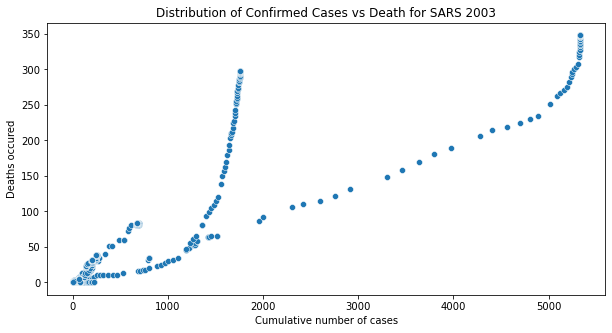

In [12]:
plt.figure(figsize = [10,5])
plt.title('Distribution of Confirmed Cases vs Death for SARS 2003')

sns.scatterplot(x = df['Cumulative_Cases'], y=df['Death_Count'])

plt.xlabel('Cumulative number of cases')
plt.ylabel("Deaths occured")

Graph 2:
Viewing the above graph with and evaluating the Recovered Feature, we can say that the number of recovered cases started increasing when the cumulative cases started increasing. We can also say that as the medical team took time to understand the disease and then in few weeks time they were able to recover many people from the disease.

Text(0, 0.5, 'Deaths occured')

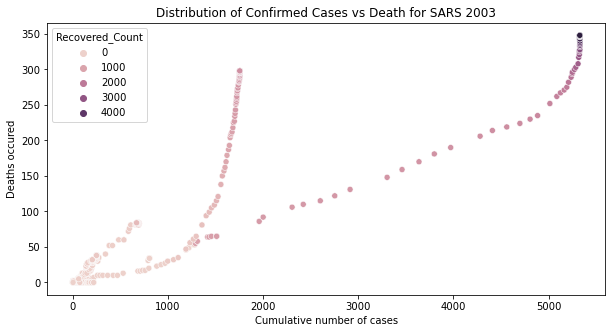

In [13]:
plt.figure(figsize = [10,5])
plt.title('Distribution of Confirmed Cases vs Death for SARS 2003')

sns.scatterplot(x = df['Cumulative_Cases'], y=df['Death_Count'], hue = df['Recovered_Count'])

plt.xlabel('Cumulative number of cases')
plt.ylabel("Deaths occured")

Graph 3: So,now we will plot the Regression Line for the above scatter plot.

Text(0, 0.5, 'Deaths occured')

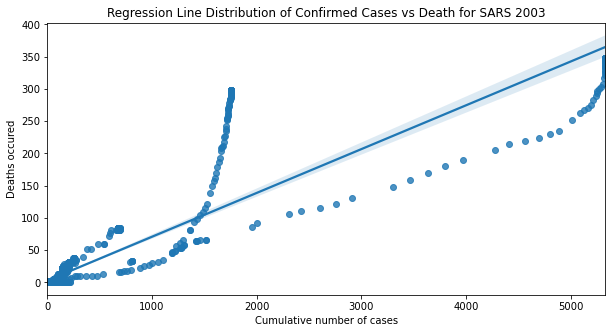

In [14]:
plt.figure(figsize = [10,5])
plt.title('Regression Line Distribution of Confirmed Cases vs Death for SARS 2003')

sns.regplot(x = df['Cumulative_Cases'], y=df['Death_Count'])

plt.xlabel('Cumulative number of cases')
plt.ylabel("Deaths occured")

## Feature Engineering

In [15]:
# Performing feature engineering and extracting details from Date feature. 
# Since the entire dataset is of year 2003, so we are not considering year. 
# Only, we are extracting month and date values.
# It is important to convert the new feature into type int 

df['Day_of_the_year'] = df.Date.dt.strftime("%d").astype(int)
df['Week_of_the_year'] = df.Date.dt.strftime("%w").astype(int)
df['Month_of_the_year'] = df.Date.dt.strftime("%m").astype(int)
df.drop(['Date'], inplace = True, axis = 1)

## Label Encoding

Here, we will first find out all the features that are not of type numeric. Then, using Label Encoding class by sklearn we will convert the feature type to numeric. 

Reason: To train a machine learning models we need all the data in numbers format (integer or float). Models don't understand text or any other data. We can use Label Encoding or One Hot Encoding for this.

In [16]:
obj_type_features = df.select_dtypes(include = "object").columns
print (obj_type_features)
print (df.Country) #Before Encoding

Index(['Country'], dtype='object')
0                    Germany
1                     Canada
2                  Singapore
3       Hong Kong SAR, China
4                Switzerland
                ...         
2533             Switzerland
2534                Thailand
2535          United Kingdom
2536           United States
2537                Viet Nam
Name: Country, Length: 2538, dtype: object


In [17]:
# We only have one feature - Country. So, now let's use Label Encoding.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Now we will transform the data of feature Country
df.Country = le.fit_transform(df.Country)

#Now print and check Country feature values after encoding
print (df.Country)

0        9
1        4
2       26
3       10
4       31
        ..
2533    31
2534    33
2535    34
2536    35
2537    36
Name: Country, Length: 2538, dtype: int64


We can see that all the values are transformed into numeric values.

Now, since there are no null values, all feature engineering is done, all object types are converted to the numeric type, we are good to start training out Linear Regression model.

But, before thath we need to divide the dataset into 2 parts: train and test dataset.
If we have 2 different dataset given in the problem statement then we may not split the data as mentioned above. 

In [18]:
from sklearn.model_selection import train_test_split

#Let us assume that we are predicting 
X = df.drop(['Death_Count'], axis = 1)
y = df['Death_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Training

In [19]:
#import the model class from sklearn 

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

## Evaluating the Model

Here, as described in the introduction we will calculate following metrics of evaluation for test data and see how well is our model performing.
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. Coefficient of determination (R2 score)

In [20]:
from sklearn import metrics

print ("Mean Absolute Error (MAE) - Test data : ", metrics.mean_absolute_error(y_test, y_pred))

print ("Mean Squared Error (MSE) - Test data : ", metrics.mean_squared_error(y_test, y_pred))

print ("Root Mean Squared Error (RMSE) - Test data : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Co-efficient of determination (R2 Score): ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error (MAE) - Test data :  9.92950166211641
Mean Squared Error (MSE) - Test data :  767.3004229796276
Root Mean Squared Error (RMSE) - Test data :  27.700188139787564
Co-efficient of determination (R2 Score):  0.806576560956122


If you have liked this explanation then please upvote for it. Also, if you want me to make such explanation notebooks for any other model of your choice then comment it below.